In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import integrate
from scipy.misc import derivative

In [54]:
def erf(x,n):
    sum=0
    t=0
    dt=x/n
    while abs(t)<abs(x):
        sum +=dt*(np.exp(-t**2))
        t+=dt
    return 2*sum/math.sqrt(np.pi)

In [53]:
def erf_taylor(x,N):
    sum=0
    n=0
    while n<=N:
        sum +=(-1)**n*x**(2*n+1)/(2*n+1)/math.factorial(n) 
        n+=1
    return 2*sum/math.sqrt(np.pi)

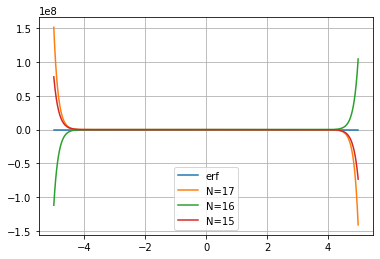

In [55]:
n=np.arange(-5,5,0.01)
plt.plot(n,[erf(x,1000) for x in n],label='erf')
plt.plot(n,[erf_taylor(x,17) for x in n],label='N=17')
plt.plot(n,[erf_taylor(x,16) for x in n],label='N=16')
plt.plot(n,[erf_taylor(x,15) for x in n],label='N=15')
plt.legend()
plt.grid(True)

In [6]:
def trapez(f,a,b,n):
    sum= 0
    t=a
    dt=(b-a)/n
    while(t<b):
        sum += dt*(0.5*f(t)+0.5*f(t+dt))
        t += dt
    return sum

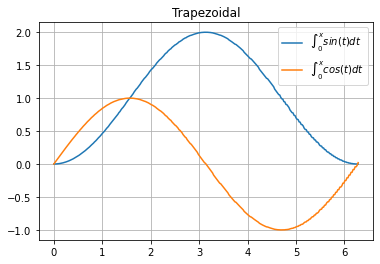

In [38]:
n1=np.linspace(0,2*np.pi,300)
plt.title('Trapezoidal')
plt.plot(n1,[trapez(np.sin,0,x,300) for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot(n1,[trapez(np.cos,0,x,300) for x in n1],label='$\int_0^x cos(t) dt$')
plt.legend()
plt.grid(True)
plt.show()

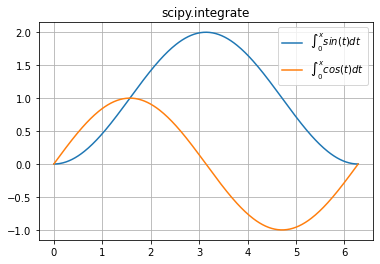

In [39]:
plt.title('scipy.integrate')
plt.plot(n1,[integrate.quad(np.sin,0,x)[0] for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot(n1,[integrate.quad(np.cos,0,x)[0] for x in n1],label='$\int_0^x cos(t) dt$')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

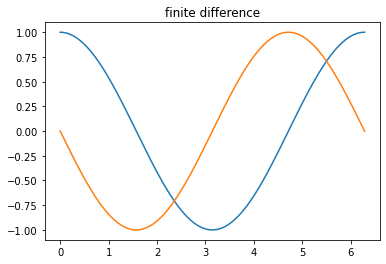

In [40]:
plt.title('finite difference')
plt.plot(n1,[cen_diff(np.sin,x,0.01) for x in n1])
plt.plot(n1,[cen_diff(np.cos,x,0.01) for x in n1])

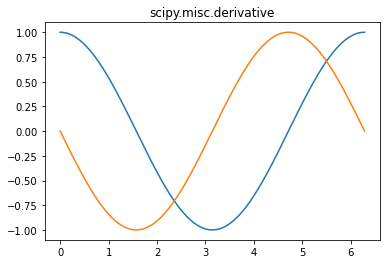

In [41]:
plt.title('scipy.misc.derivative')
plt.plot(n1,[derivative(np.sin,x,dx=0.01) for x in n1] )
plt.plot(n1,[derivative(np.cos,x,dx=0.01) for x in n1] )
plt.show()